In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Zeus.csv")

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SectionAlignment,8010.0,4.199806e+03,3.478998e+03,4096.0,4096.0,4096.0,4096.0,1.310720e+05
FileAlignment,8010.0,6.794067e+02,7.561982e+02,512.0,512.0,512.0,512.0,4.096000e+03
SizeOfHeaders,8010.0,1.923947e+03,2.582254e+03,512.0,1024.0,1024.0,4096.0,1.310720e+05
ImageBase,8010.0,4.562083e+06,2.172752e+07,4194304.0,4194304.0,4194304.0,4194304.0,1.875706e+09
SizeOfImage,8010.0,8.666188e+05,6.929515e+06,20480.0,184320.0,286720.0,352256.0,5.370511e+08
SizeOfHeaders.1,8010.0,1.923947e+03,2.582254e+03,512.0,1024.0,1024.0,4096.0,1.310720e+05
DllCharacteristics,8010.0,1.030701e+04,1.527278e+04,0.0,0.0,0.0,32768.0,6.400000e+04
Characteristics,8010.0,2.677242e+03,8.566702e+03,258.0,259.0,270.0,271.0,3.316700e+04
HighEntropy,8010.0,6.359551e-01,4.811914e-01,0.0,0.0,1.0,1.0,1.000000e+00
LowEntropy,8010.0,6.923845e-01,4.615353e-01,0.0,0.0,1.0,1.0,1.000000e+00


In [10]:
#DataFrame with columns
columns = pd.DataFrame(list(df.columns.values[1:]))

#DataFrame with data types
data_types = pd.DataFrame(df.dtypes, columns=['Data Type'])

#DataFrame with Count
data_count = pd.DataFrame(df.count(), columns=['Count'])

#DataFrame with unique values
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(df.columns.values):
    unique_value_counts.loc[v] = [df[v].nunique()]

#DataFrame with minimum values
minimum_values = pd.DataFrame(columns=['Minimum Values'])
for v in list(df.columns.values):
    minimum_values.loc[v] = [df[v].min()]

#DataFrame with maximum values
maximum_values = pd.DataFrame(columns=['Maximum Values'])
for v in list(df.columns.values):
    maximum_values.loc[v] = [df[v].max()]
        
data_quality_report = data_types.join(data_count).join(unique_value_counts).join(minimum_values).join(maximum_values)
print('Data Quality Report')
data_quality_report


Data Quality Report


,Data Type,Count,Unique Values,Minimum Values,Maximum Values
FileName,object,8010,8010,zeusbin_0007d213acc8f79cdca26922a89b13ee.ex0.json,zeusbin_fffdfb8831f289b5f5764d9526264442.ex0.json
SectionAlignment,int64,8010,3,4096,131072
FileAlignment,int64,8010,3,512,4096
SizeOfHeaders,int64,8010,8,512,131072
TimeDateStamp,object,8010,4800,0x0 [Thu Jan 1 00:00:00 1970 UTC],0xFF869800 [Sat Nov 7 04:20:16 2105 UTC]
ImageBase,int64,8010,6,4194304,1875705856
SizeOfImage,int64,8010,343,20480,537051136
SizeOfHeaders.1,int64,8010,8,512,131072
DllCharacteristics,int64,8010,18,0,64000
Characteristics,int64,8010,13,258,33167


# Visualizing Data

In [11]:
values = df['Characteristics'].value_counts().keys().tolist()
counts = df['Characteristics'].value_counts().tolist()
ids = [x for x in range(len(values))]

<BarContainer object of 13 artists>

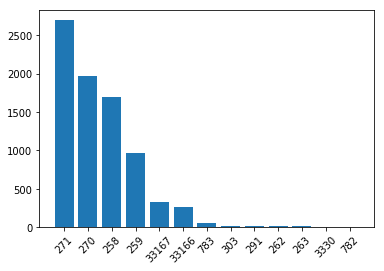

In [12]:
plt.xticks(ids, values, rotation='45')
plt.bar(ids,counts)

In [13]:
values = df['DllCharacteristics'].value_counts().keys().tolist()
counts = df['DllCharacteristics'].value_counts().tolist()
ids = [x for x in range(len(values))]

<BarContainer object of 18 artists>

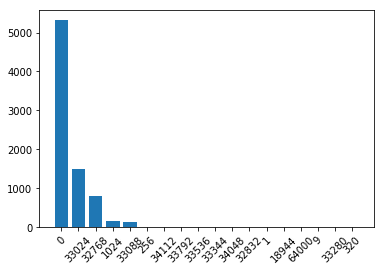

In [14]:
plt.xticks(ids, values, rotation='45')
plt.bar(ids,counts)

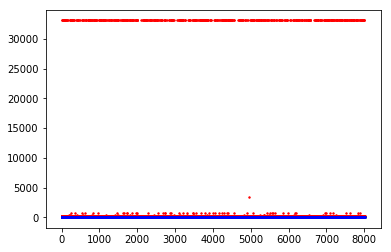

In [15]:
x = df.index.tolist()
y1 = df['Characteristics'].tolist()
y2 = (df['DllCharacteristics']/1000).tolist()
y3 = (df['ImageBase']/1000000000).tolist()

plt.scatter(x,y1,s=2, label="Total Suspicious Sections", color="r")
plt.scatter(x,y2,s=2, label="Total Suspicious Sections", color="g")
plt.scatter(x,y3,s=2, label="Total Suspicious Sections", color="b")

plt.show()